<div style="text-align: center;">
    <img src="../images/iofbanner.png" alt="Banner curso" style="width:80%">
</div>

In [2]:
import os
import numpy as np
# import pandas as pd
import netCDF4 as nc
import matplotlib.pyplot as plt

# Tema 6

### Ekman

In [3]:
# Calculo del estrès del viento
rhoa    = 1.25      # densidad del aire
Cd      = 2.3e-3    # Coeficiente de arrastre
W10     = 10        # m/s velocidad del viento
Tw      = rhoa * Cd * np.power(W10, 2)

In [4]:
# Calculo de Coriolis
lat = 60 * (np.pi / 180 )       # latitud
Om  = 2 * np.pi / (24 * 3600)
f   = 2 * Om * np.sin(lat)

In [5]:
# Grosor de la capa de Ekman
Az = 5e-3  #viscosidad turbulenta
De = np.pi * np.sqrt((2 * Az) / f)

In [6]:
# Velocidad superficial
rhow    = 1027      # densidad del agua de mar
Vo      = (np.sqrt(2) * np.pi * Tw) / (rhow * f * De);

In [7]:
# definiciòn del vector de velocidad
dz  = 0.5
z = -1 * np.arange(0,2 * np.ceil(De) + dz, dz)

u = Vo * np.exp((np.pi * z) / De) * (np.cos((np.pi / 4) - ((np.pi * z) / De)))
v = -Vo * np.exp((np.pi * z) / De) * (np.sin((np.pi / 4) - ((np.pi * z) / De)))
V = np.sqrt(np.power(u,2) +np.power(v, 2))

Ut = np.sum(u)*dz
Vt = np.sum(v)*dz

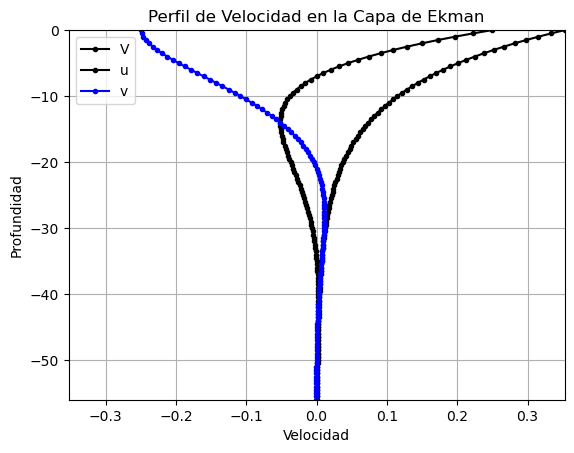

In [8]:
# Gráficos
plt.figure()
plt.plot(V, z, 'k.-', label='V')
plt.plot(u, z, 'k.-', label='u')
plt.plot(v, z, 'b.-', label='v')
plt.grid()
plt.legend()
plt.axis([-Vo, Vo, np.min(z), 0])
plt.xlabel('Velocidad')
plt.ylabel('Profundidad')
plt.title('Perfil de Velocidad en la Capa de Ekman')
plt.show()

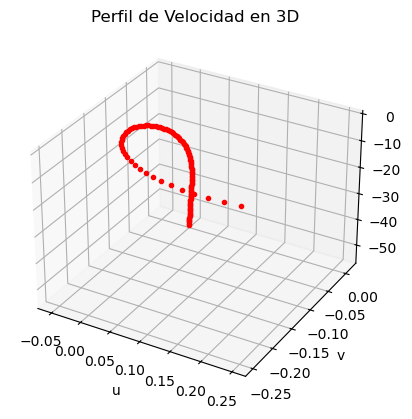

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(u, v, z, '.r')
ax.grid()
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('z')
plt.title('Perfil de Velocidad en 3D')
plt.show()

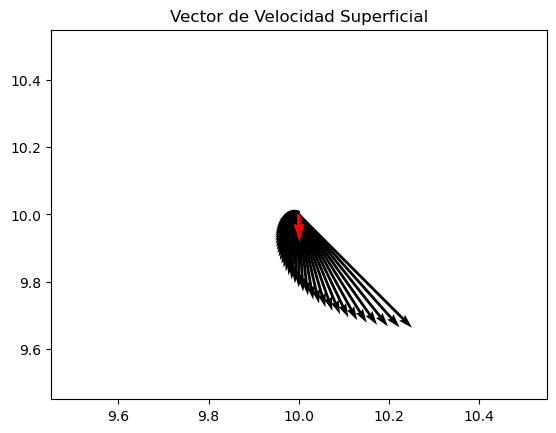

In [10]:
# Gráfica de vectores
x = np.repeat(10, np.max(len(u)))
y = np.repeat(10, np.max(len(u)))

plt.figure()
plt.quiver(x, y, u, v)
plt.quiver(x[0], y[0], Ut * 0.02, Vt * 0.02, color='r')
plt.title('Vector de Velocidad Superficial')
plt.show()

### Geostrofia de altimetria

In [11]:
# Identificar el nombre del archivo netCDF
resources_path = "../resources/"
catalogo = [f for f in os.listdir("../resources/") if f.startswith('d') and f.endswith('.nc')]
if not catalogo:
    raise FileNotFoundError("No se encontraron archivos .nc en la carpeta 'resources'.")
file_name = os.path.join(resources_path, catalogo[0])
# file_name = catalogo[0]1
file_name

'../resources/dt_global_allsat_phy_l4_20171206_20210318.nc'

In [12]:
# Obtener información del archivo netCDF
dataset = nc.Dataset(file_name)
Lat = dataset.variables['latitude'][:]
Lon = dataset.variables['longitude'][:]
Z2 = dataset.variables['adt'][:]
Z = Z2

/tmp/ipykernel_34226/3520494831.py:3: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  Lat = dataset.variables['latitude'][:]


In [12]:
Z =np.ma.masked_invalid(Z[0, :, :])
Z

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-2147483647.0)

In [13]:
print("Dimensiones de Lon:", Lon.shape)
print("Dimensiones de Lat:", Lat.shape)
print("Dimensiones de Z:", Z.shape)
Z = Z[0, :, :]
print("Dimensiones de Z:", Z.shape)


Dimensiones de Lon: (3600,)
Dimensiones de Lat: (1700,)
Dimensiones de Z: (1700, 3600)


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

/tmp/ipykernel_52492/1695086801.py:4: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


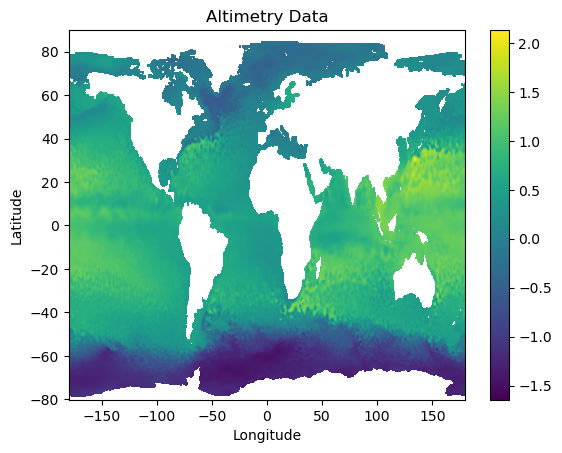

In [15]:
# Graficar la variable Z
plt.figure()
plt.pcolor(Lon, Lat, Z, shading='nearest')
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Altimetry Data')
plt.show()

In [14]:
# Crear la malla de coordenadas
LO, LA = np.meshgrid(Lon, Lat)
nLat = Lat.size
nLon = Lon.size

In [16]:
Y1 = (LA - LA[0]) * 60 * 1.852 * 1000
X1 = np.zeros_like(LO)
for i in range(nLat):
    X1[i, :] = (LO[i, :] - LO[i, 0]) * 60 * 1.852 * 1000 * np.cos(np.radians(LA[i, 0]))


In [17]:
omega = (2 * np.pi) / (24 * 3600)
phi = np.radians(LA)
f = 2 * omega * np.sin(phi)
g = 9.81

u = np.zeros((nLat, nLon))
v = np.zeros((nLat, nLon))

for i in range(nLat - 1):
    for j in range(nLon - 1):
        dz = Z[i + 1, j] - Z[i, j]
        dy = Y1[i + 1, j] - Y1[i, j]
        u[i, j] = -(g / f[i, j]) * (dz / dy)

/tmp/ipykernel_52492/3982831282.py:13: UserWarning: Warning: converting a masked element to nan.
  u[i, j] = -(g / f[i, j]) * (dz / dy)


In [ ]:
for j in range(nLon - 1):
    for i in range(nLat - 1):
        dz = Z[i, j + 1] - Z[i, j]
        dx = X1[i, j + 1] - X1[i, j]
        v[i, j] = (g / f[i, j]) * (dz / dx)

u[nLat - 1, :] = u[nLat - 2, :]
u[:, nLon - 1] = u[:, nLon - 2]
v[nLat - 1, :] = v[nLat - 2, :]
v[:, nLon - 1] = v[:, nLon - 2]

In [ ]:
plt.figure()
plt.pcolor(LO, LA, Vx, shading='flat')
plt.colorbar()
plt.clim(0, 2.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Velocity Magnitude')
plt.show()

In [ ]:
X2 = LO.flatten()
a = np.arange(0, len(X2), 13)

plt.figure()
plt.pcolor(LO, LA, Vx, shading='flat')
plt.colorbar()
plt.clim(0, 2.5)
plt.quiver(LO.flatten()[a], LA.flatten()[a], u.flatten()[a], v.flatten()[a], scale=10, color='w')
plt.title('With Altimetry')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Geostrofia Teorica

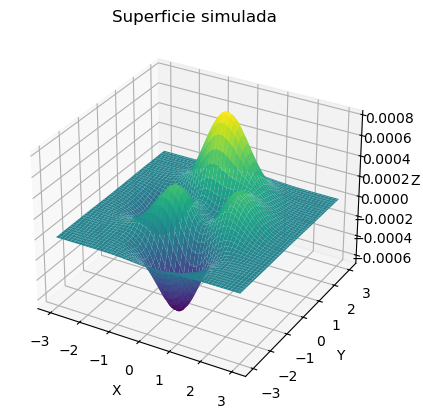

In [13]:
# Definir la función peaks
def peaks(n=49):
    x = np.linspace(-3, 3, n)
    y = np.linspace(-3, 3, n)
    X, Y = np.meshgrid(x, y)
    Z = 3 * (1 - X) ** 2 * np.exp(-X ** 2 - (Y + 1) ** 2) - \
        10 * (X / 5 - X ** 3 - Y ** 5) * np.exp(-X ** 2 - Y ** 2) - \
        1 / 3 * np.exp(-(X + 1) ** 2 - Y ** 2)
    return X, Y, Z

# Simulando una variación en el nivel del mar con la función peaks
n = 100
X, Y, Z = peaks(n)
Z = Z / 10000

# Crear la superficie
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title('Superficie simulada')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

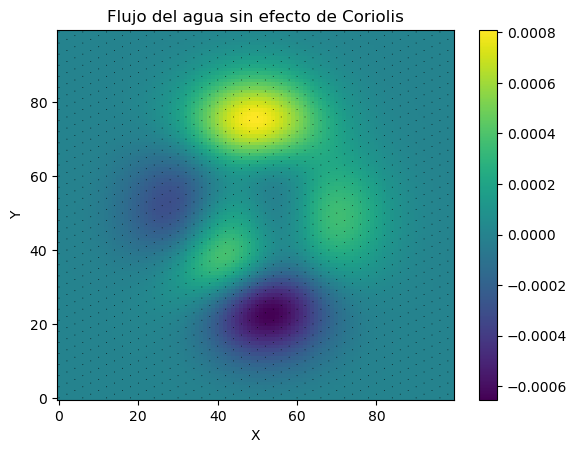

In [14]:
# Calcular la pendiente de la superficie
Fy, Fx = np.gradient(Z)
X, Y = np.meshgrid(np.arange(n), np.arange(n))

# ¿Cómo fluiría el agua si coriolis no actuara solo por efecto de la pendiente?
plt.figure()
plt.pcolor(X, Y, Z, shading='auto', cmap='viridis')
plt.colorbar()
x = X.flatten()
y = Y.flatten()
fx = -Fx.flatten()
fy = -Fy.flatten()
a = np.arange(0, len(x), 6)  # adelgazamiento de vectores
plt.quiver(x[a], y[a], fx[a], fy[a], scale=3, color='k')
plt.title('Flujo del agua sin efecto de Coriolis')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


IndexError: index 6 is out of bounds for axis 0 with size 1

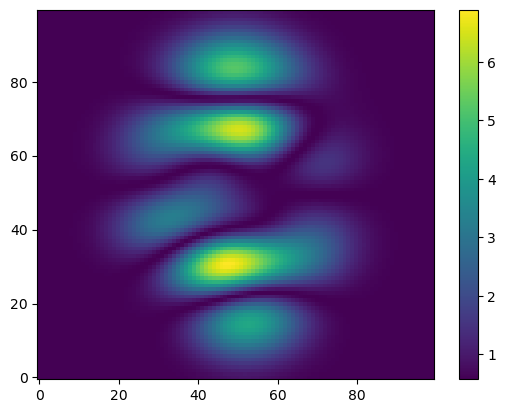

In [15]:
# Calculo de Coriolis, asumiendo que todo ocurre a una latitud de 45 grados
omega = (2 * np.pi) / (24 * 3600)
lat = 45
phi = np.deg2rad(lat)
f = 2 * omega * np.sin(phi)
Fx = 0.6 / 100000

g = 9.81
u = -(g / f) * Fy
v = (g / f) * Fx
Vx = np.sqrt(u**2 + v**2)

plt.figure()
plt.pcolor(X, Y, Vx, shading='auto', cmap='viridis')
plt.colorbar()
U = u.flatten()
V = v.flatten()
a = np.arange(0, len(x), 6)  # adelgazamiento de vectores
plt.quiver(x[a], y[a], U[a], V[a], scale=3, color='k')
plt.title('Velocidad con efecto de Coriolis')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

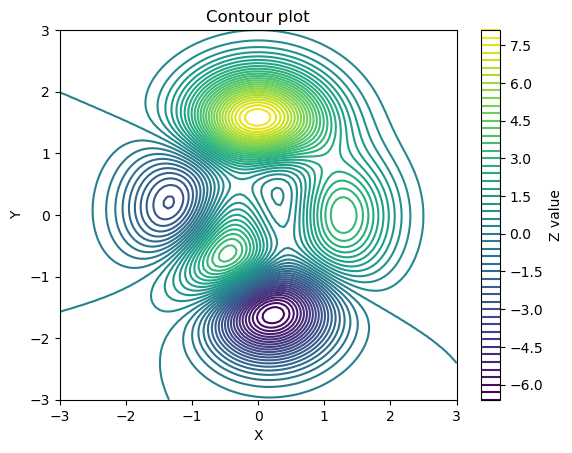

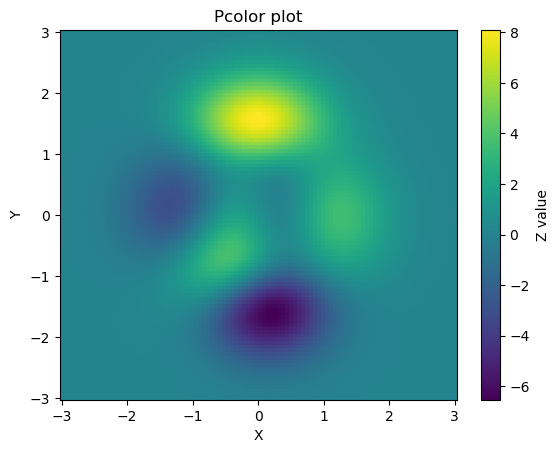

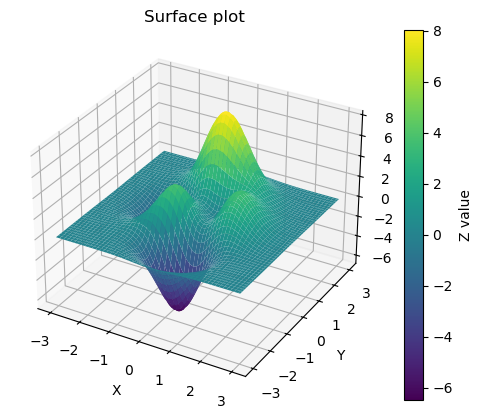

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the peaks function
def peaks(n=49):
    x = np.linspace(-3, 3, n)
    y = np.linspace(-3, 3, n)
    X, Y = np.meshgrid(x, y)
    Z = 3 * (1 - X) ** 2 * np.exp(-X ** 2 - (Y + 1) ** 2) - \
        10 * (X / 5 - X ** 3 - Y ** 5) * np.exp(-X ** 2 - Y ** 2) - \
        1 / 3 * np.exp(-(X + 1) ** 2 - Y ** 2)
    return X, Y, Z

# Generate the data
n = 100
X, Y, Z = peaks(n)

# Contour plot
plt.figure()
plt.contour(X, Y, Z, 50, cmap='viridis')
plt.colorbar(label='Z value')
plt.title('Contour plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Pcolor plot
plt.figure()
plt.pcolor(X, Y, Z, shading='auto', cmap='viridis')
plt.colorbar(label='Z value')
plt.title('Pcolor plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surf, label='Z value')
ax.set_title('Surface plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

### Inerciales

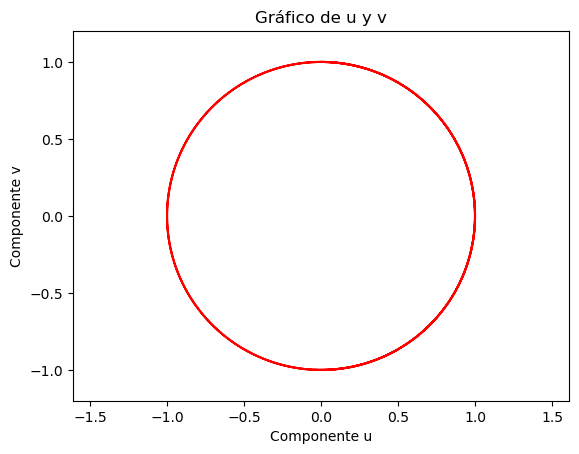

In [17]:
# Velocidad inicial
Vh = 1

# Parámetro de Coriolis
lat = 70 * (np.pi / 180)
Om = 2 * np.pi / (24 * 3600)
f = 2 * Om * np.sin(lat)

# Generar un tiempo inicialmente aleatorio
Ti = 32 * 3600  # horas en segundos
t = np.arange(1, Ti + 1)

# Calculo de las corrientes inerciales
u = Vh * np.sin(f * t)
v = Vh * np.cos(f * t)

x = np.repeat(10, len(u))
y = np.repeat(10, len(u))
a = np.arange(0, len(x), 1200)

# Gráfico de u y v
plt.figure()
plt.plot(u, v, 'r')
plt.xlabel('Componente u')
plt.ylabel('Componente v')
plt.axis('equal')
plt.axis([-1.2, 1.2, -1.2, 1.2])
plt.title('Gráfico de u y v')
plt.show()


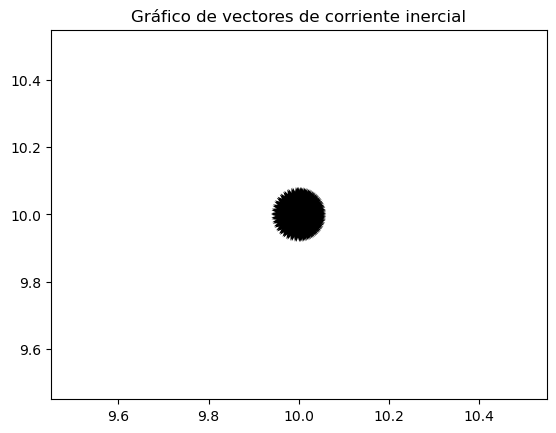

In [18]:
# Gráfico de quiver
plt.figure()
plt.quiver(x[a], y[a], u[a], v[a])
plt.title('Gráfico de vectores de corriente inercial')
plt.show()

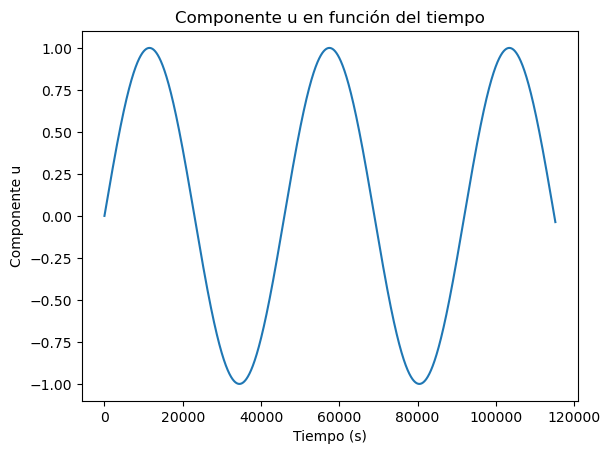

In [19]:
# Gráfico de t y u
plt.figure()
plt.plot(t, u)
plt.xlabel('Tiempo (s)')
plt.ylabel('Componente u')
plt.title('Componente u en función del tiempo')
plt.show()

In [20]:
# Radio de deformación de Rosby
r = Vh / f
Rkm = r / 1000

# Periodo inercial
Ti_inercial = 2 * np.pi / f
Ti_hr = Ti_inercial / 3600

print(f'Radio de deformación de Rosby: {Rkm:.2f} km')
print(f'Periodo inercial: {Ti_hr:.2f} horas')

Radio de deformación de Rosby: 7.32 km
Periodo inercial: 12.77 horas
